In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

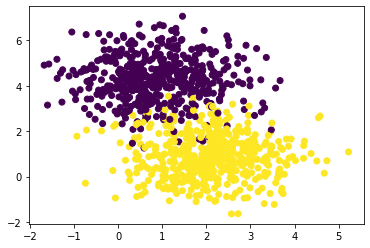

In [67]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Sklearn Implementation

0.9606060606060606

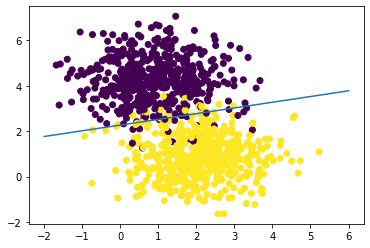

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

x1_sample = np.linspace(-2, 6)

plt.scatter(X[:, 0], X[:, 1], c=y)

for i, (coef, intercept) in enumerate(zip(model.coef_, model.intercept_)):
    x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
    plt.plot(x1_sample, x2_sample)
    
model.score(X_test, y_test)

## Custom Implementation

In [70]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self, X, y):
        
        self.__y = y.reshape(-1, 1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        self.__X = X_mod
        
        self.__theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self.__iters):
            err.append(self.error())
            self.gradient_accend()
            
        self.theta_ = self.__theta 
            
        return err
        
    def gradient_accend(self):
        delta_theta = self.gradient()
        self.__theta -= delta_theta
        
    def gradient(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        diff = -(ya - yh)        
        return np.dot(self.__X.T, diff) * self.__lr
        
    def hypothesis(self, X):
        prod = np.dot(X, self.__theta)
        return 1 / (1 + np.exp(-prod))
        
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
        return -np.mean(ll)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)
    
#     def confusion_matrix(self, X, y):
#         yp = self.predict(X)
        
#         tp = np.mean((y==1) & (yp==1))
#         tn = np.mean((y==0) & (yp==0))
#         fp = np.mean((y==0) & (yp==1))
#         fn = np.mean((y==1) & (yp==0))
        
#         return np.array([[tp, fp], [fn, tn]])

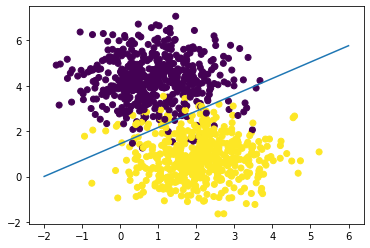

In [71]:
model = CustomLogisticRegression()
model.fit(X_train, y_train)

x1_sample = np.linspace(-2, 6)
parameters = model.theta_
x2_sample = - parameters[1]/parameters[2] * x1_sample - parameters[0]/parameters[2]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x1_sample, x2_sample)

In [72]:
model.score(X_test, y_test)

0.9454545454545454